In [1]:
import pandas as pd

# Load the dataset
ev_data = pd.read_csv("/content/station_data_dataverse.csv")  # Replace 'ev_dataset.csv' with your actual file name

# Display basic information about the dataset
print(ev_data.info())

# Display summary statistics
print(ev_data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3395 entries, 0 to 3394
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sessionId       3395 non-null   int64  
 1   kwhTotal        3395 non-null   float64
 2   dollars         3395 non-null   float64
 3   created         3395 non-null   object 
 4   ended           3395 non-null   object 
 5   startTime       3395 non-null   int64  
 6   endTime         3395 non-null   int64  
 7   chargeTimeHrs   3395 non-null   float64
 8   weekday         3395 non-null   object 
 9   platform        3395 non-null   object 
 10  distance        2330 non-null   float64
 11  userId          3395 non-null   int64  
 12  stationId       3395 non-null   int64  
 13  locationId      3395 non-null   int64  
 14  managerVehicle  3395 non-null   int64  
 15  facilityType    3395 non-null   int64  
 16  Mon             3395 non-null   int64  
 17  Tues            3395 non-null   i

In [2]:
# Handle missing values
ev_data = ev_data.dropna()  # Remove rows with missing values

# Convert categorical variables to numerical (if needed)
# Example: ev_data['fuel_type'] = pd.get_dummies(ev_data['fuel_type'])


In [34]:
ev_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2330 entries, 343 to 3394
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sessionId       2330 non-null   int64  
 1   kwhTotal        2330 non-null   float64
 2   dollars         2330 non-null   float64
 3   created         2330 non-null   object 
 4   ended           2330 non-null   object 
 5   startTime       2330 non-null   int64  
 6   endTime         2330 non-null   int64  
 7   chargeTimeHrs   2330 non-null   float64
 8   weekday         2330 non-null   object 
 9   platform        2330 non-null   object 
 10  distance        2330 non-null   float64
 11  userId          2330 non-null   int64  
 12  stationId       2330 non-null   int64  
 13  locationId      2330 non-null   int64  
 14  managerVehicle  2330 non-null   int64  
 15  facilityType    2330 non-null   int64  
 16  Mon             2330 non-null   int64  
 17  Tues            2330 non-null  

In [7]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select relevant features for segmentation
features_for_segmentation = ev_data[['kwhTotal', 'dollars', 'chargeTimeHrs', 'distance', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']]

# Handle categorical variables if any
# Example: features_for_segmentation = pd.get_dummies(features_for_segmentation, columns=['weekday', 'platform'], drop_first=True)

# Standardize features if necessary
features_for_segmentation = StandardScaler().fit_transform(features_for_segmentation)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3)  # Adjust the number of clusters as needed
ev_data['segment'] = kmeans.fit_predict(features_for_segmentation)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


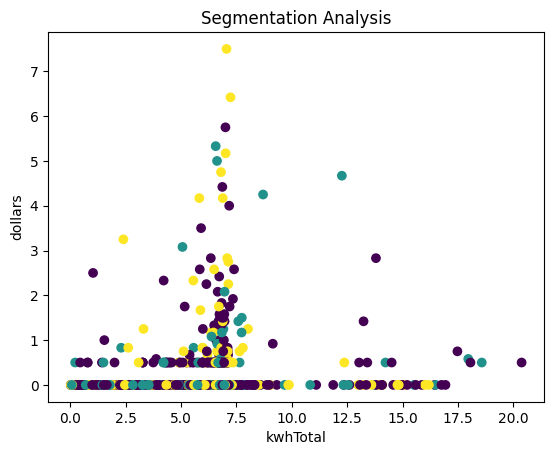

In [9]:
import matplotlib.pyplot as plt

# Visualize the clusters
plt.scatter(ev_data['kwhTotal'], ev_data['dollars'], c=ev_data['segment'], cmap='viridis')
plt.title('Segmentation Analysis')
plt.xlabel('kwhTotal')
plt.ylabel('dollars')
plt.show()


<ipython-input-23-5ee8787b91f3>:16: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


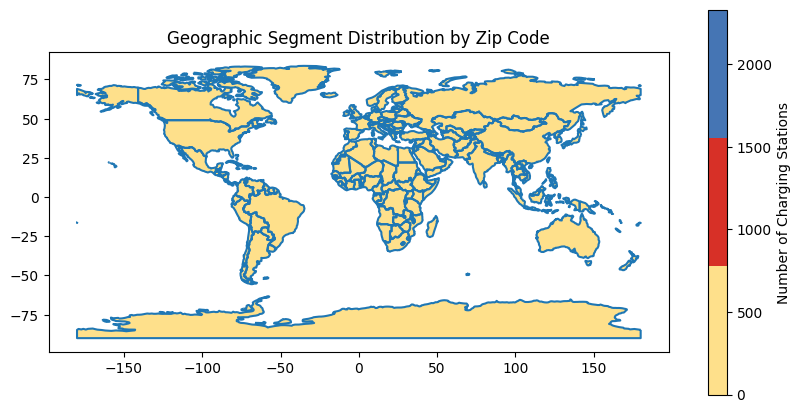

In [23]:
import matplotlib.pyplot as plt
import geopandas as gpd
from matplotlib.colors import ListedColormap

# Convert 'reportedZip' to 'object' type
ev_data_geo['reportedZip'] = ev_data_geo['reportedZip'].astype('str')

# Remove rows with missing 'reportedZip' values
ev_data_geo = ev_data.dropna(subset=['reportedZip'])

# Geographic segmentation - Zip code distribution on a map
zip_counts = ev_data_geo['reportedZip'].value_counts().reset_index()
zip_counts.columns = ['reportedZip', 'Count']

# Load the world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge count data with the GeoDataFrame using pd.concat
zip_geo = pd.concat([world.set_index('iso_a3'), zip_counts.set_index('reportedZip')], axis=1, sort=False)

# Fill NaN values with 0
zip_geo['Count'] = zip_geo['Count'].fillna(0)

# Create a categorical colormap
cmap = ListedColormap(['#fee08b', '#d73027', '#4575b4'])  # Adjust colors as needed

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
zip_geo.boundary.plot(ax=ax)
zip_geo.plot(column='Count', legend=True, ax=ax, legend_kwds={'label': "Number of Charging Stations"}, cmap=cmap)
plt.title('Geographic Segment Distribution by Zip Code')
plt.show()


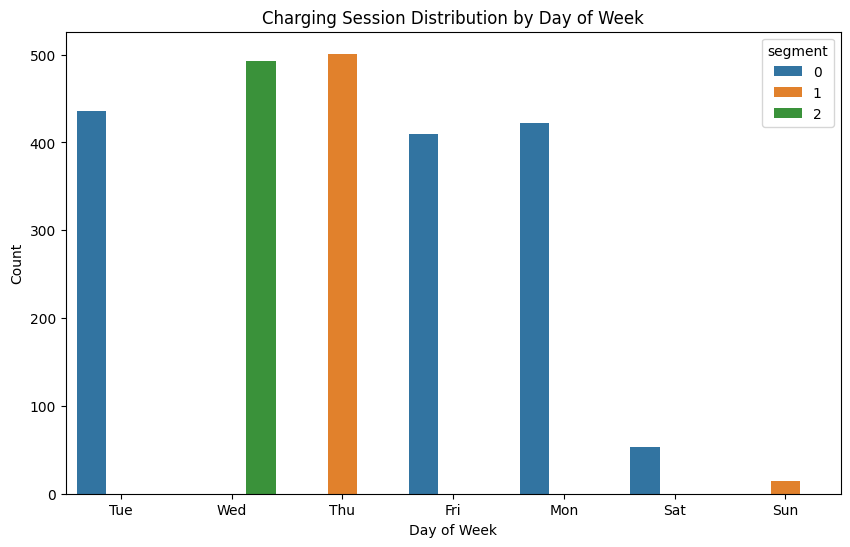

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(x='weekday', data=ev_data, hue='segment')
plt.title('Charging Session Distribution by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.show()


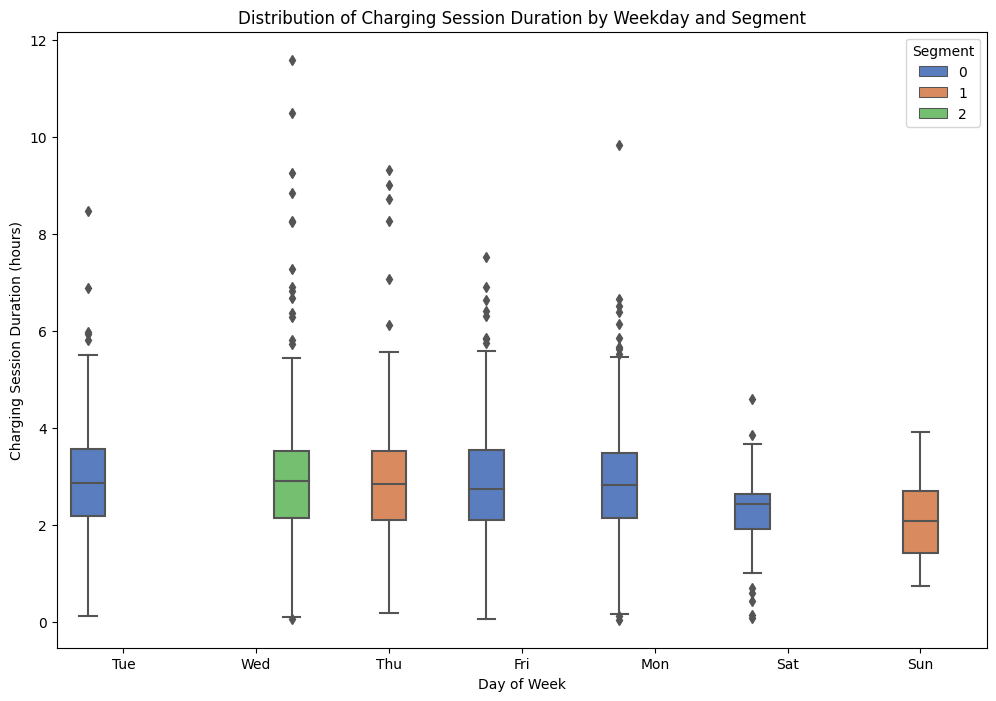

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.boxplot(x='weekday', y='chargeTimeHrs', data=ev_data, hue='segment', palette='muted')
plt.title('Distribution of Charging Session Duration by Weekday and Segment')
plt.xlabel('Day of Week')
plt.ylabel('Charging Session Duration (hours)')
plt.legend(title='Segment')
plt.show()
